# [MAC0417] Visão e Processamento de Imagens - Exercício Programa 1
*05 de Outubro de 2020*

## Introdução 
Neste exercício programa, os estudantes coletaram uma base de imagens de objetos em nossas casas e geramos esta visualização dos dados.

Integrantes do grupo:

| Nome | NUSP |
|------|------|
| Daniela Favero | 10277443 |
| Mateus Barbosa | 8993368 |
| Vitor Guidi | 8038091 |

A base de dados e os metadados se encontram no nosso repositório do [GitHub](https://github.com/danigfavero/Visao-computacional-e-processamento-de-imagens).

## Tabela Sumária dos Dados

### Geral

Informações gerais sobre a base de dados:

| Nome do Atributo | Atributo |
|------|------|
| Número de classes | 10 |
| Número de imagens | 1080 |
| Tamanho da base | 2148,5 MB |
| Resolução das imagens | 3264x2448 ou 4000x3000 ou 4608x3456 ou 72x72 ou 800x450 |

### Detalhada por Classe
| Nome do objeto | Número de objetos | Variações de Fundo (com Descrição) | Variações de Iluminação (com Descrição) | Número de Repetições | Total de Mostras |
|------|------|------|------|------|------|
| Calça | 3 | Claro, Escuro e Madeira | {Indoor, Outdoor} X {Dia, Noite} | 3 | 108 |
| Camiseta | 3 | Claro, Escuro e Madeira | {Indoor, Outdoor} X {Dia, Noite} | 3 | 108 |
| Caneca | 3 | Claro, Escuro e Madeira | {Indoor, Outdoor} X {Dia, Noite} | 3 | 108 |
| Casaco | 3 | Claro, Escuro e Madeira | {Indoor, Outdoor} X {Dia, Noite} | 3 | 108 |
| Colher | 3 | Claro, Escuro e Madeira | {Indoor, Outdoor} X {Dia, Noite} | 3 | 108 |
| Controle Remoto | 3 | Claro, Escuro e Madeira | {Indoor, Outdoor} X {Dia, Noite} | 3 | 108 |
| Faca | 3 | Claro, Escuro e Madeira | {Indoor, Outdoor} X {Dia, Noite} | 3 | 108 |
| Frigideira | 3 | Claro, Escuro e Madeira | {Indoor, Outdoor} X {Dia, Noite} | 3 | 108 |
| Garfo | 3 | Claro, Escuro e Madeira | {Indoor, Outdoor} X {Dia, Noite} | 3 | 108 |
| Panela | 3 | Claro, Escuro e Madeira | {Indoor, Outdoor} X {Dia, Noite} | 3 | 108 |

## Metadados

Informações sobre os arquivos das imagens tiradas estão em *metadata.csv*, organizadas deste modo (apenas 10 instâncias, para exemplificar):

In [5]:
import csv

with open('original_dataset/metadata.csv', newline='') as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    count = 0
    for row in csv_reader:
        print(', '.join(row))
        count += 1
        if count > 10:
            break

NAME_FILE,DATE,CLASS,BACKGROUND,LIGHT,INDOOR
COLHER_DIA_INDOOR_ESCURO1a.jpg,2020-09-26,COLHER,ESCURO,True,True
COLHER_DIA_INDOOR_ESCURO1b.jpg,2020-09-26,COLHER,ESCURO,True,True
COLHER_DIA_INDOOR_ESCURO1c.jpg,2020-09-26,COLHER,ESCURO,True,True
COLHER_DIA_OUTDOOR_ESCURO1a.jpg,2020-09-26,COLHER,ESCURO,True,False
COLHER_DIA_OUTDOOR_ESCURO1b.jpg,2020-09-26,COLHER,ESCURO,True,False
COLHER_DIA_OUTDOOR_ESCURO1c.jpg,2020-09-26,COLHER,ESCURO,True,False
COLHER_NOITE_INDOOR_ESCURO1a.jpg,2020-09-26,COLHER,ESCURO,False,True
COLHER_NOITE_INDOOR_ESCURO1b.jpg,2020-09-26,COLHER,ESCURO,False,True
COLHER_NOITE_INDOOR_ESCURO1c.jpg,2020-09-26,COLHER,ESCURO,False,True
COLHER_NOITE_OUTDOOR_ESCURO1a.jpg,2020-09-26,COLHER,ESCURO,False,False


## Visualização

Utilizaremos funções MNIST-like para visualizar nossa base de dados.
Para facilitar a visualização, apenas 30 imagens serão mostradas dentre as 1080.

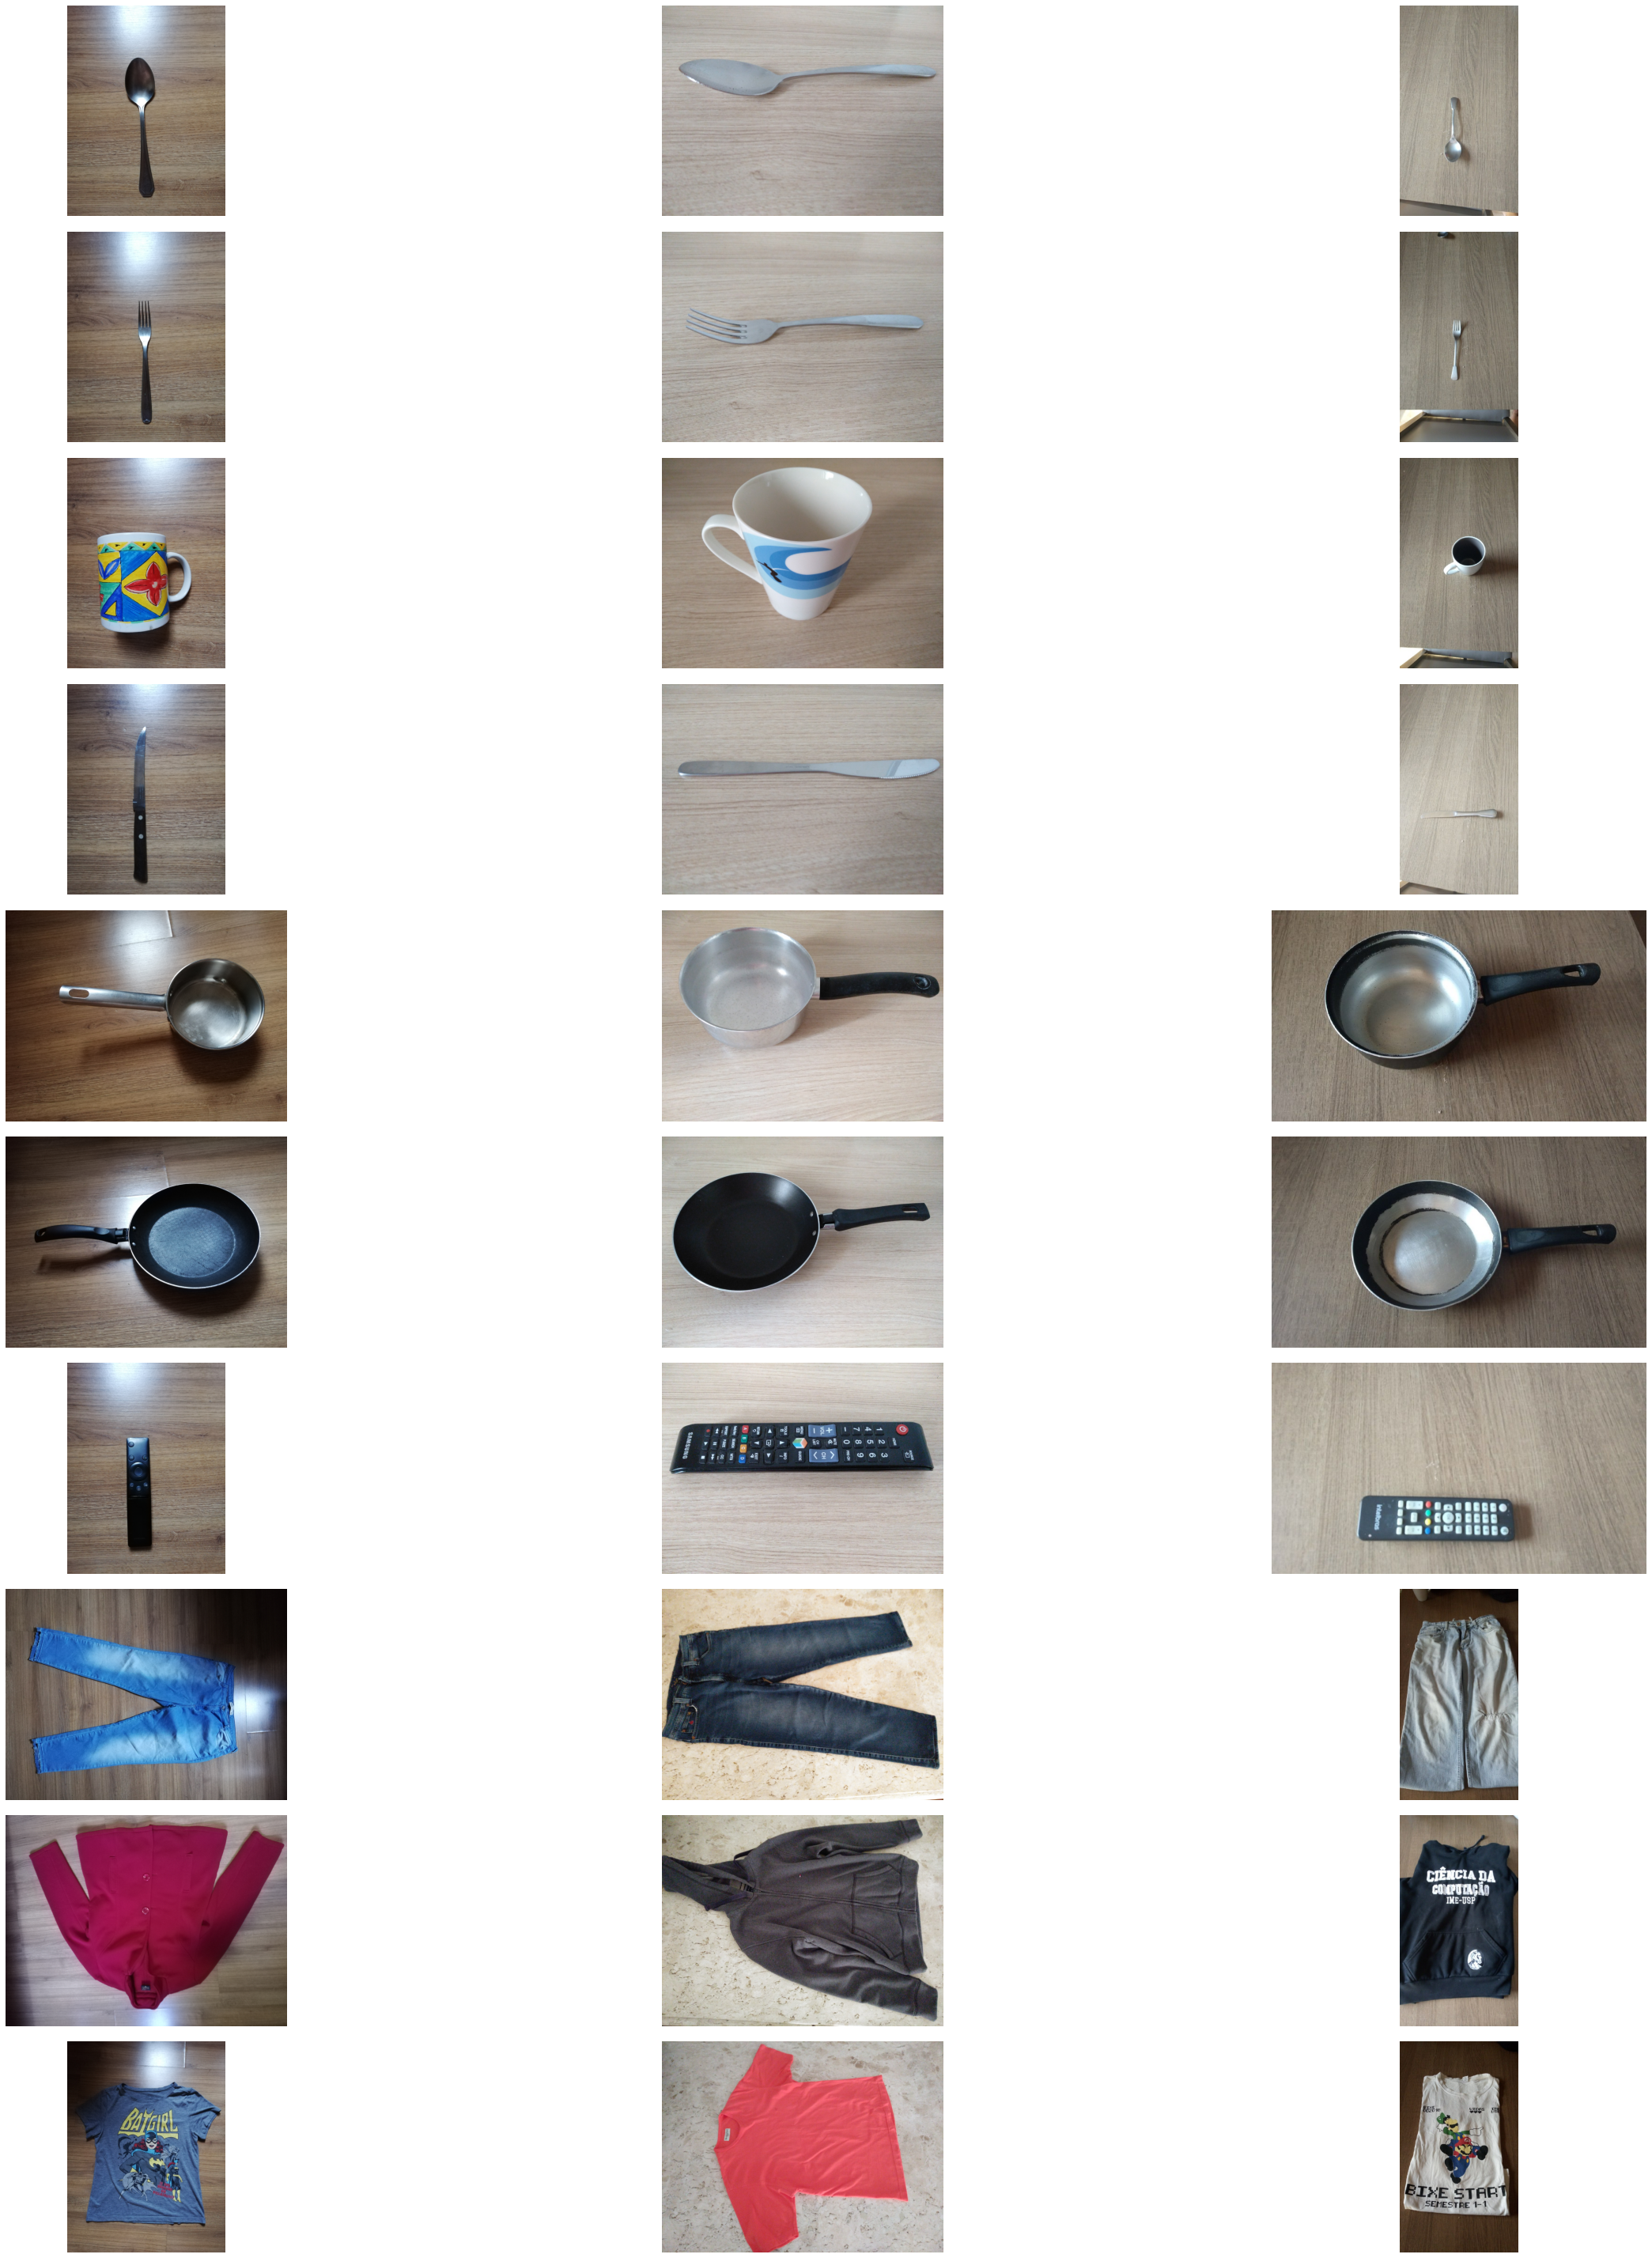

In [6]:
import matplotlib.pyplot as plt
import matplotlib
from skimage import io

matplotlib.rcParams['font.size'] = 18

url_prefix = "https://raw.githubusercontent.com/danigfavero/Visao-computacional-e-processamento-de-imagens/master/"
directory = "original_dataset/"
objs = ["colheres/COLHER",
        "garfos/GARFO",
        "canecas/CANECA",
        "facas/FACA",
        "panelas/PANELA",
        "frigideiras/FRIGIDEIRA",
        "controles_remotos/CONTROLE",
        "calcas/CALCA",
        "casacos/CASACO",
        "camisetas/CAMISETA"]
instances = 3 # número de instâncias de cada objeto

fig, axes = plt.subplots(len(objs), instances, figsize=(40, 40))
for i in range(len(objs)):
    for j in range(instances):
        url = url_prefix + directory + objs[i] + "_DIA_INDOOR_MADEIRA" + str(j+1) + "a.jpg"
        for _ in range(3): # evitando erros de conexão (3 tentativas)
            try:
                img = io.imread(url)
            except ConnectionResetError:
                continue
            break

        axes[i, j].imshow(img, cmap=plt.cm.gray)
        axes[i, j].axis('off')
fig.tight_layout()
plt.show()